In [171]:
library(readxl)
library(dplyr)
library(tidyverse)
library(pROC)
# Required libraries
library(caret)  # For confusion matrix, precision, recall, and MCC
library(ggplot2)  # For visualizing ROC curves
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [241]:
b1 <- read.csv('data_panels_batch1.csv')
b2 <- read.csv('data_panels_batch2.csv')
groupings <- read.csv('naz_demo.csv')
b1g <- groupings[1:17,2]
rownames(b1) <- b1$X

b2g <- groupings[18:45,2]
rownames(b2) <- b2$X

b1 <- b1 %>% dplyr::select(2:18) %>% scale() %>% as.data.frame()
b2 <- b2 %>% dplyr::select(2:46) %>% scale() %>% as.data.frame() 

#from caleb's code
miRNA_panels <- c(
    "hsa-miR-23a-3p",
    "hsa-miR-223-3p",
    "hsa-let-7a-5p",
    "hsa-miR-15b-5p",
    "hsa-miR-374a-3p",
    "hsa-let-7f-5p"
    )
len_miRNAs <- length(miRNA_panels)
combn_index <- combn(len_miRNAs,4)


In [242]:
b1

,Z1,Z11,Z12,Z13,Z14,Z15,Z16,Z18,Z2,Z21,Z22,Z23,Z5,Z6,Z7,Z8,Z9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hsa-miR-23a-3p,-0.4123362,0.1244349,-0.42382611,-0.1145087,-0.31213976,-0.2163403,-0.23770508,-0.2329425,-0.6333727,-0.18591146,-0.8390669,-0.82712962,-0.5353058,-0.5156802,-0.8766279,-0.44838521,-0.14781738
hsa-miR-223-3p,-0.2530448,0.3368668,-0.02291231,-0.1698711,-0.04366832,0.2212904,-0.01286364,-0.2329425,-0.1673779,-0.01924027,-0.8390669,0.05710612,-0.1181697,-0.7640676,0.3710296,0.07914338,-0.01751698
hsa-let-7a-5p,1.2673472,1.0598176,1.17377784,1.1858255,1.23341280,1.1314056,1.17971321,1.2191116,1.3814863,1.10916559,1.2682030,1.26569151,1.3819867,1.3916417,1.1827994,1.14636106,1.11100331
hsa-miR-15b-5p,-1.3137853,-1.2113782,-0.25166221,-0.5113951,-0.48007749,-1.1083643,-0.40710487,-0.2329425,-0.8454862,-0.44901395,0.1247172,-0.82712962,-0.7088475,-0.7640676,-0.8766279,-0.09714089,-0.25111649
hsa-miR-374a-3p,-0.4123362,-1.2113782,-1.51553179,-1.4627506,-1.43768782,-1.1083643,-1.53569830,-1.5281391,-0.8454862,-1.53702132,-0.8390669,-0.82712962,-1.0791631,-0.5156802,-0.8766279,-1.61237310,-1.65862168
hsa-let-7f-5p,1.1241553,0.9016369,1.04015458,1.0727000,1.04016058,1.0803730,1.01365867,1.0078548,1.1102367,1.08202142,1.1242806,1.15859124,1.0594993,1.1678539,1.0760546,0.93239477,0.96406922


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Joining with `by = join_by(miRNA1, miRNA2, miRNA3, miRNA4)`
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Joining with `by = join_by(miRNA1, miRNA2, miRNA3, miRNA4)`
Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Joining with `by = join_by(miRNA1, miRNA2, miRNA3, miRNA4)`


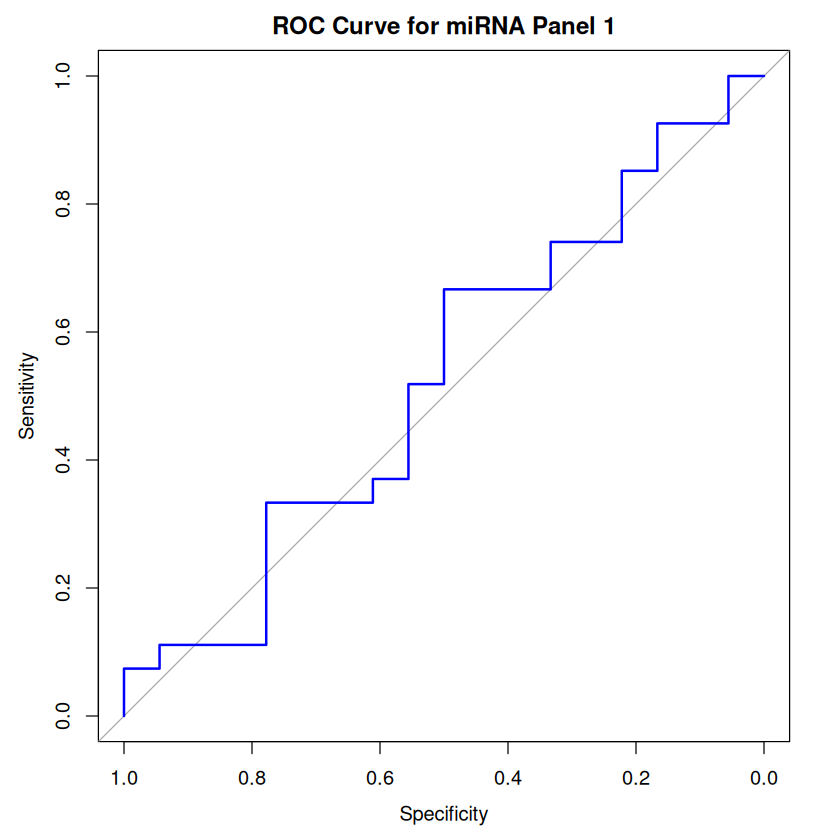

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Joining with `by = join_by(miRNA1, miRNA2, miRNA3, miRNA4)`


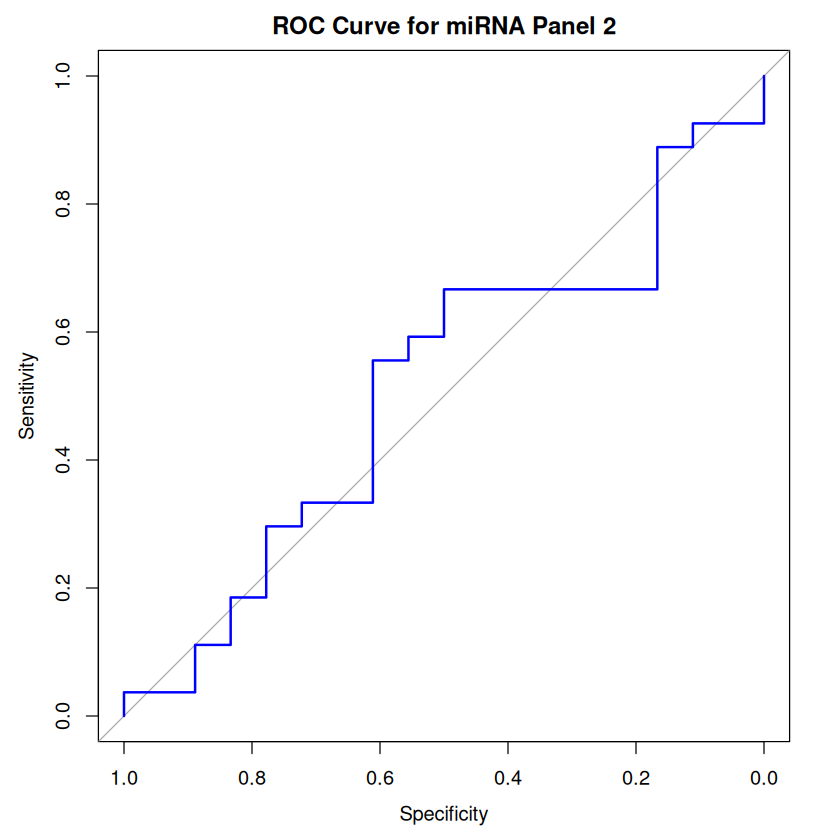

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Joining with `by = join_by(miRNA1, miRNA2, miRNA3, miRNA4)`


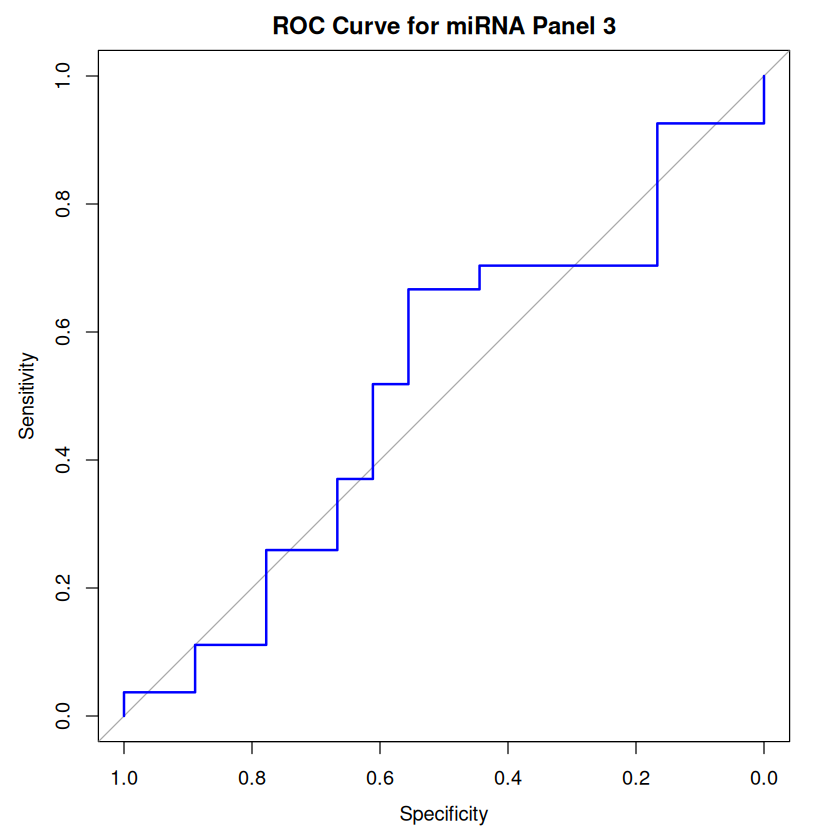

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Joining with `by = join_by(miRNA1, miRNA2, miRNA3, miRNA4)`


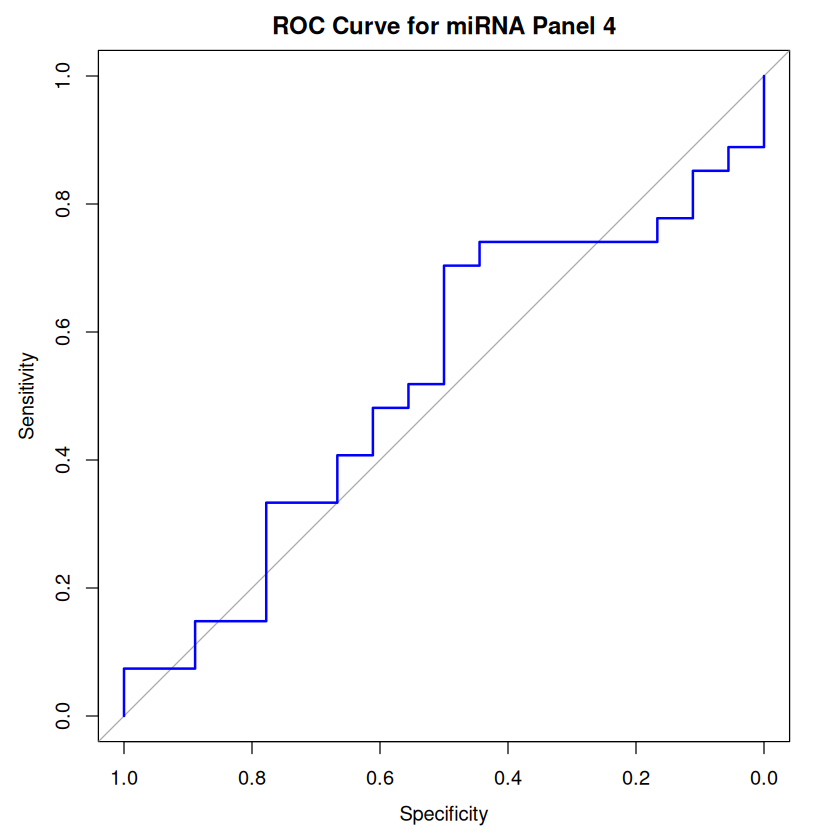

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Joining with `by = join_by(miRNA1, miRNA2, miRNA3, miRNA4)`


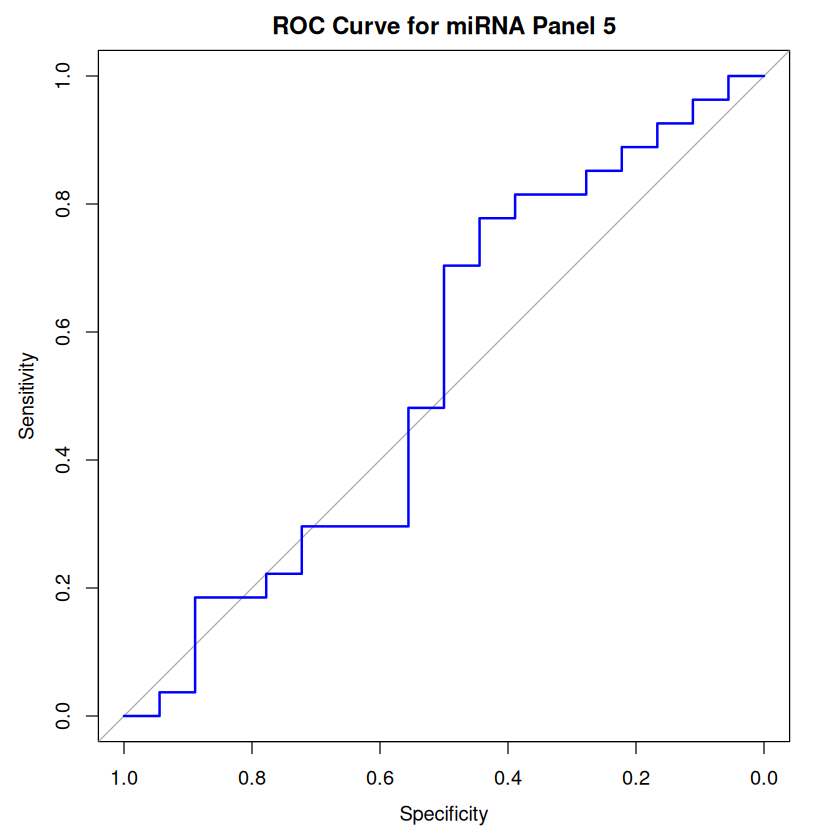

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Joining with `by = join_by(miRNA1, miRNA2, miRNA3, miRNA4)`


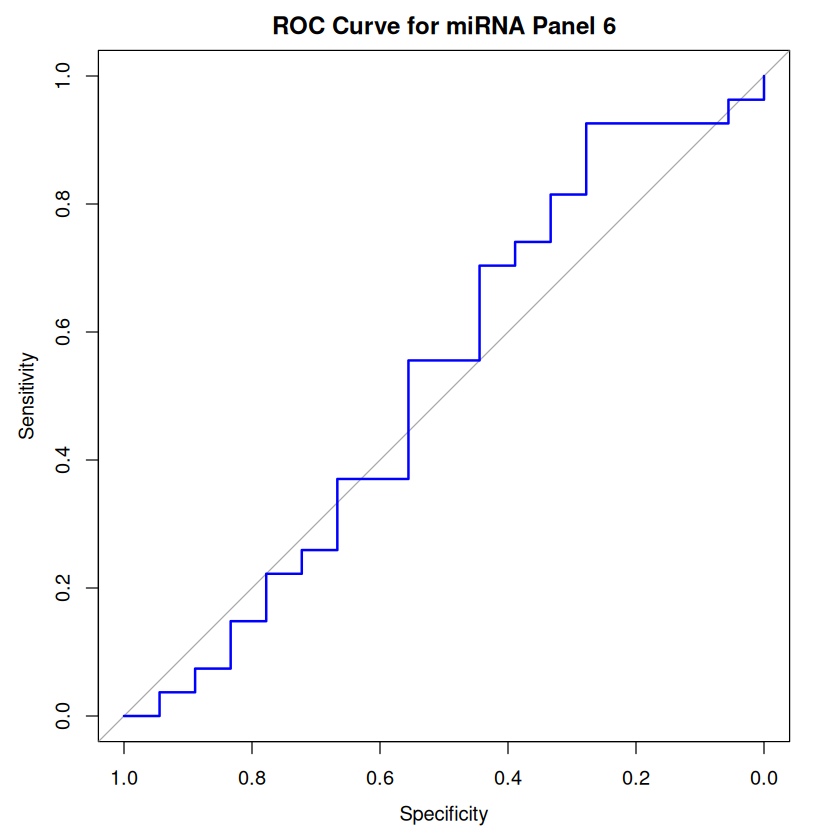

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Joining with `by = join_by(miRNA1, miRNA2, miRNA3, miRNA4)`


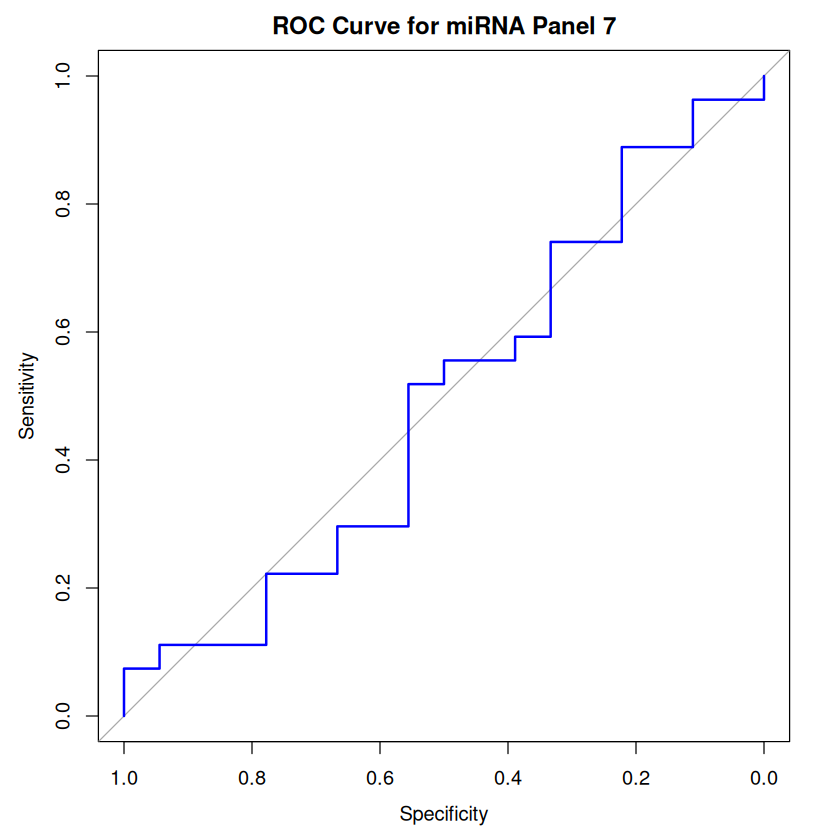

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Joining with `by = join_by(miRNA1, miRNA2, miRNA3, miRNA4)`


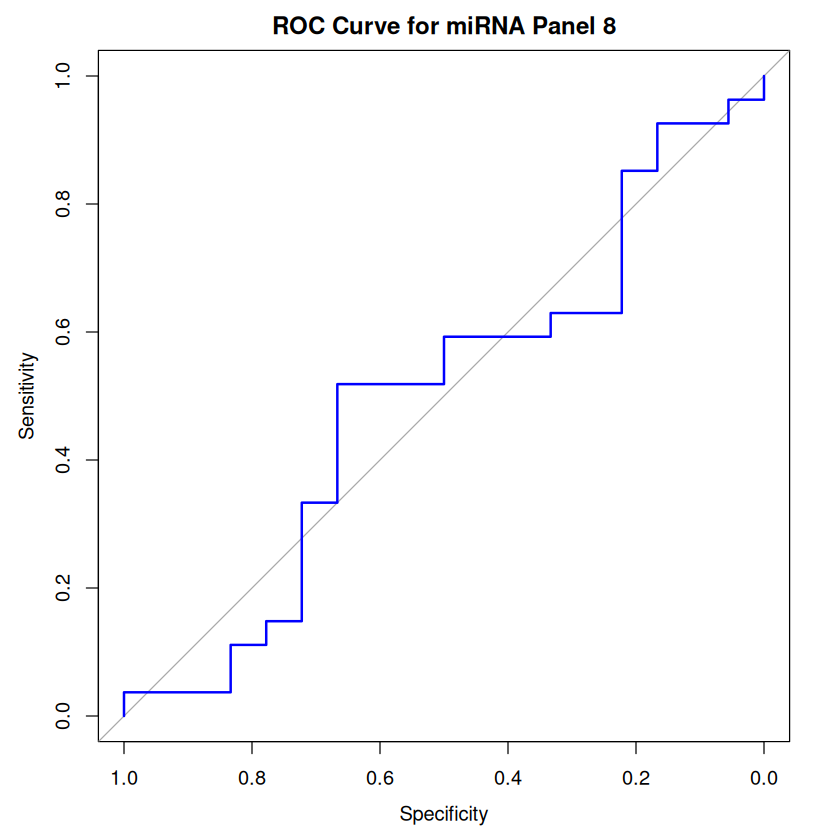

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Joining with `by = join_by(miRNA1, miRNA2, miRNA3, miRNA4)`


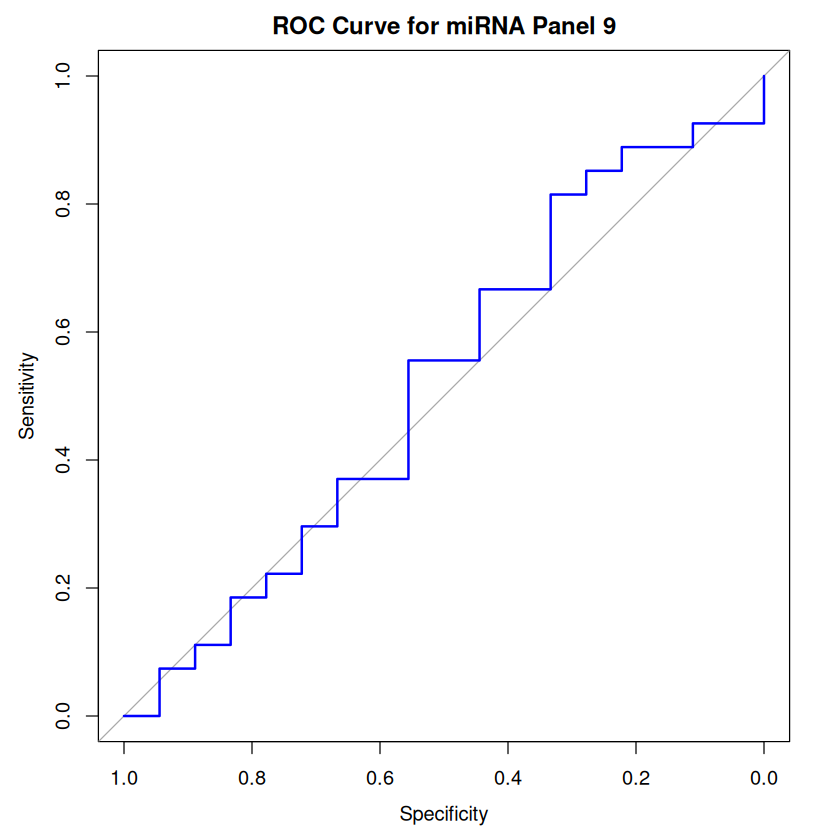

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Joining with `by = join_by(miRNA1, miRNA2, miRNA3, miRNA4)`


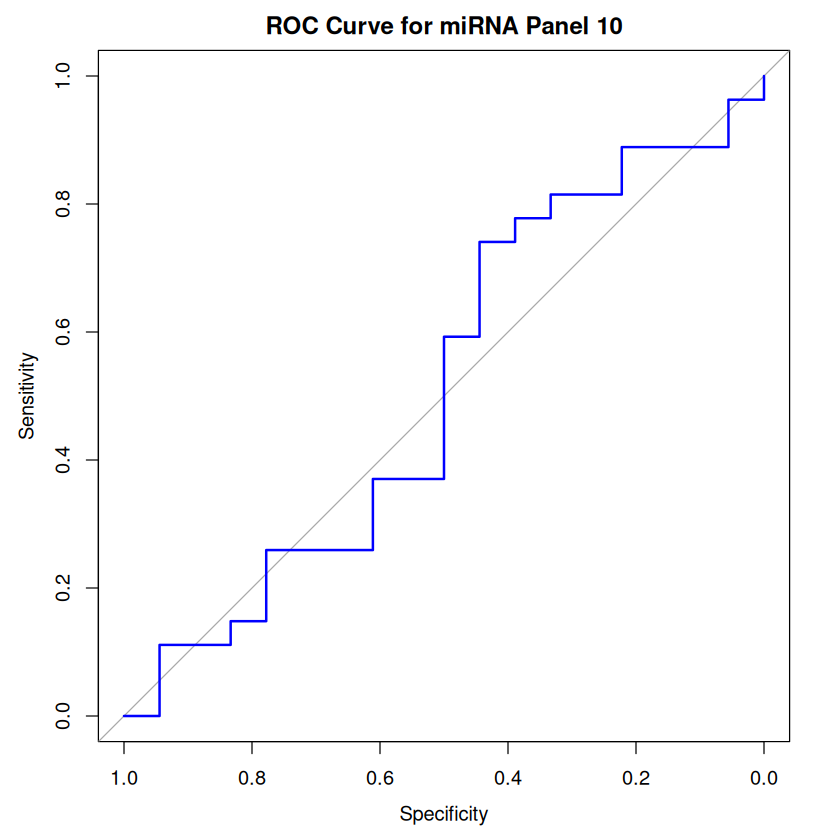

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Joining with `by = join_by(miRNA1, miRNA2, miRNA3, miRNA4)`


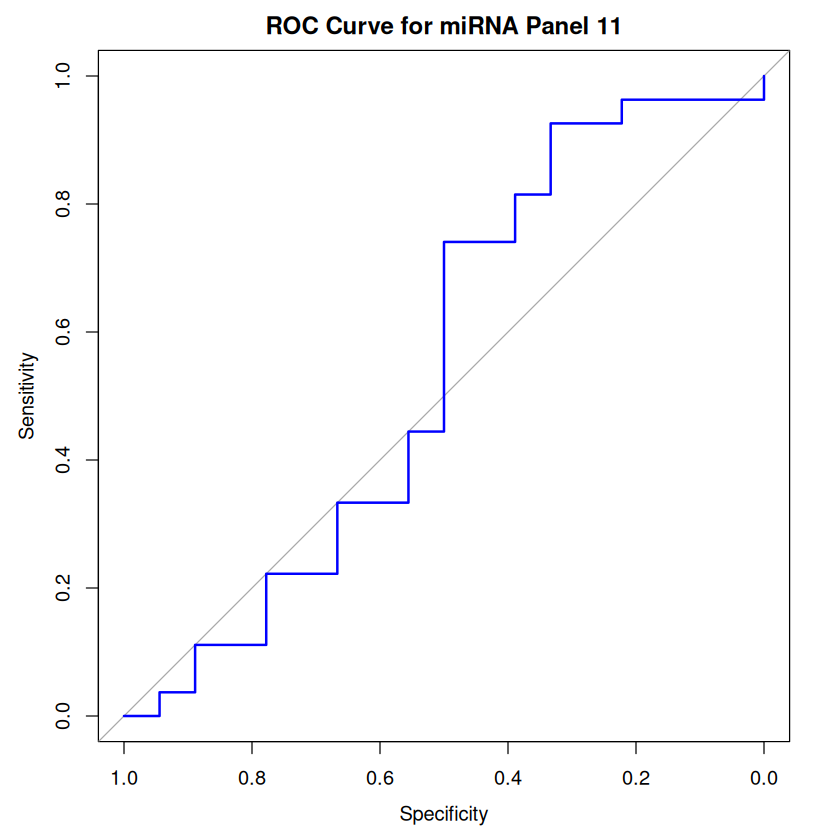

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Joining with `by = join_by(miRNA1, miRNA2, miRNA3, miRNA4)`


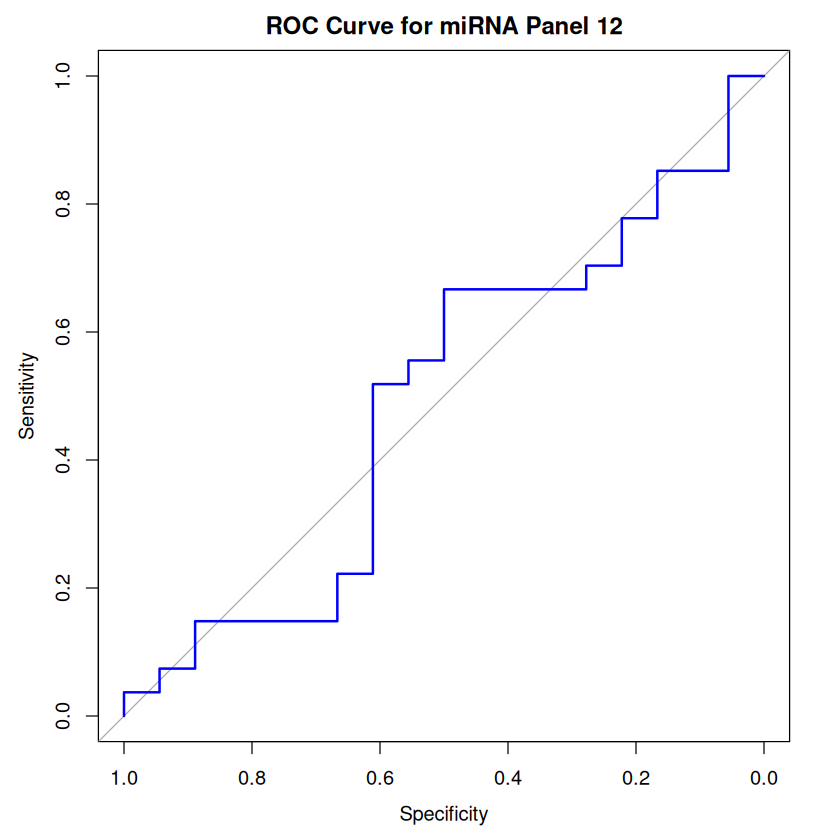

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Joining with `by = join_by(miRNA1, miRNA2, miRNA3, miRNA4)`


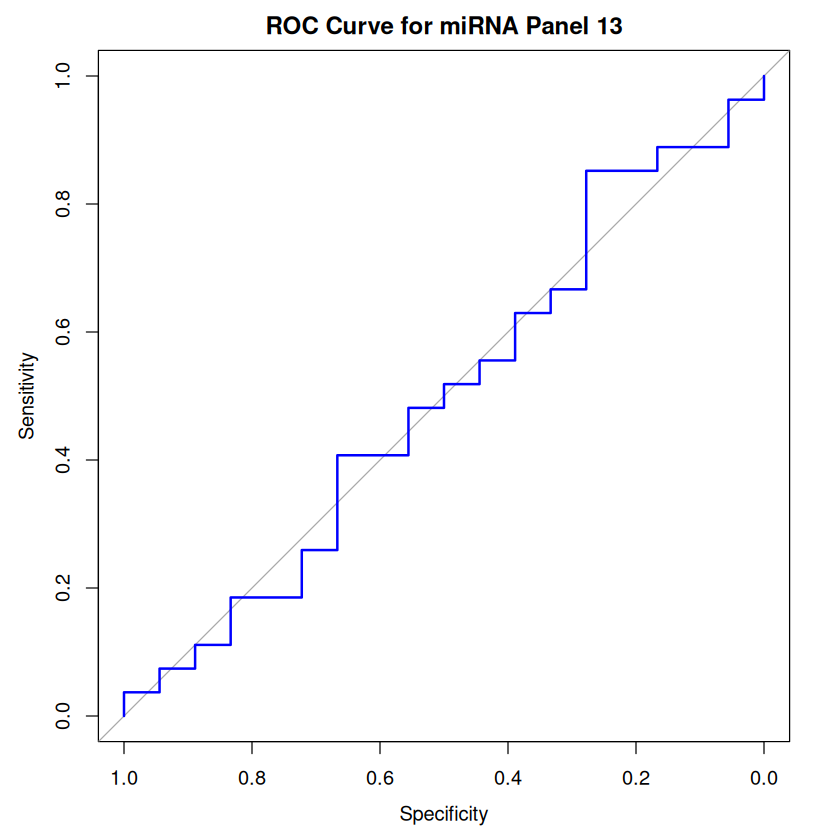

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Joining with `by = join_by(miRNA1, miRNA2, miRNA3, miRNA4)`


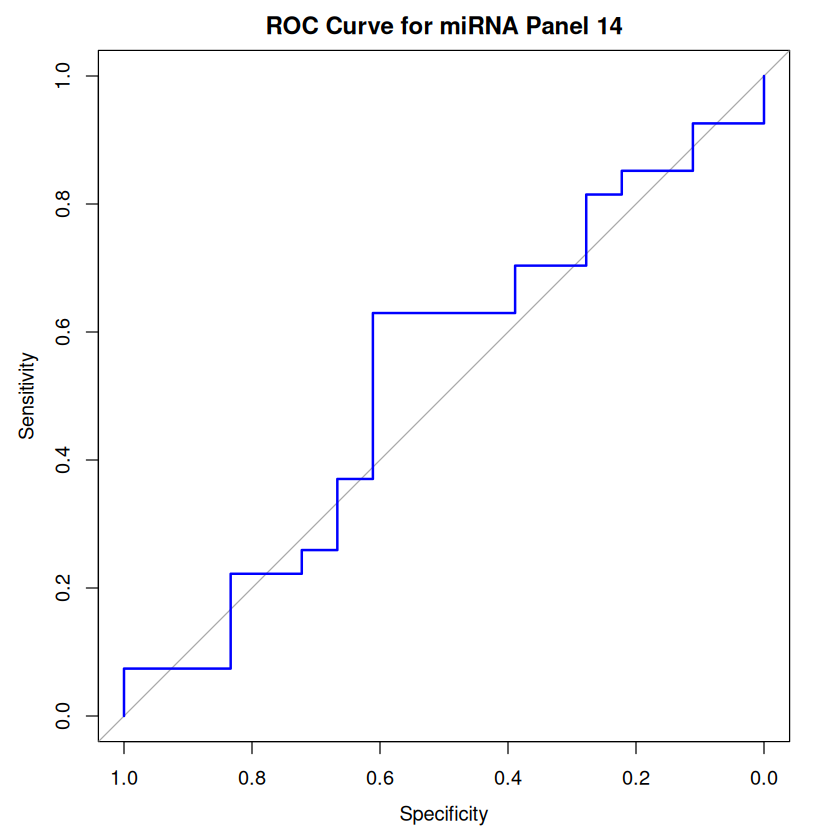

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Joining with `by = join_by(miRNA1, miRNA2, miRNA3, miRNA4)`


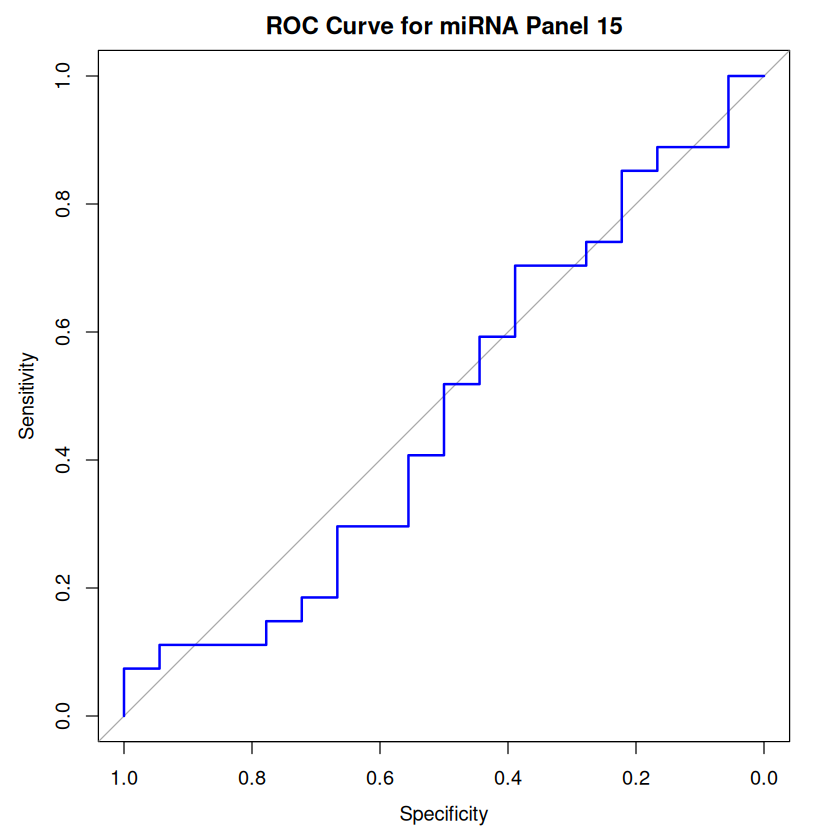

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Joining with `by = join_by(miRNA1, miRNA2, miRNA3, miRNA4)`


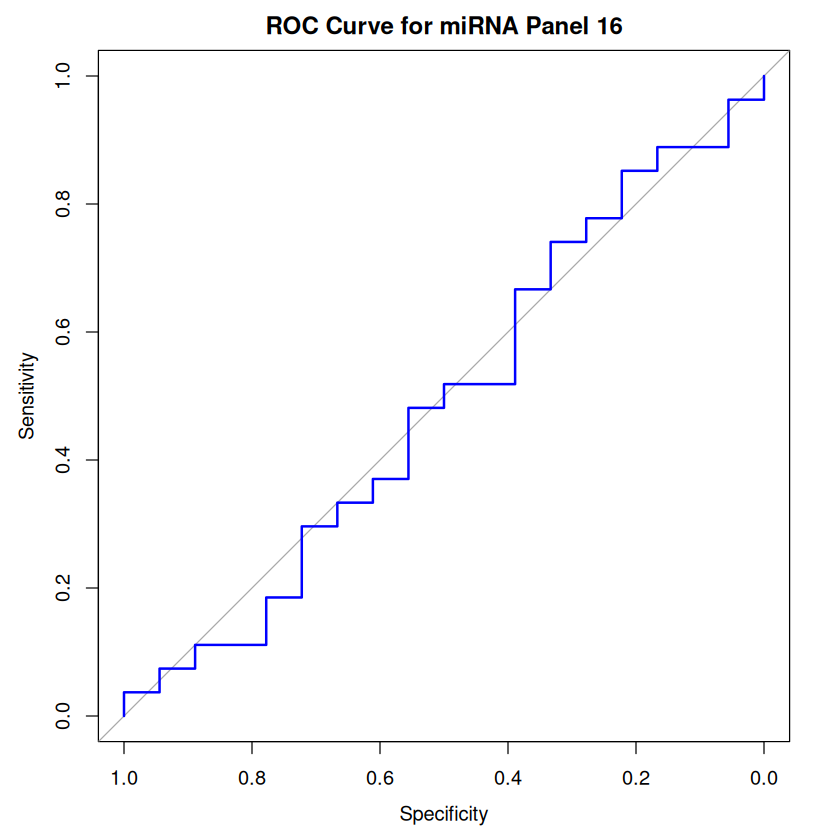

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Joining with `by = join_by(miRNA1, miRNA2, miRNA3, miRNA4)`


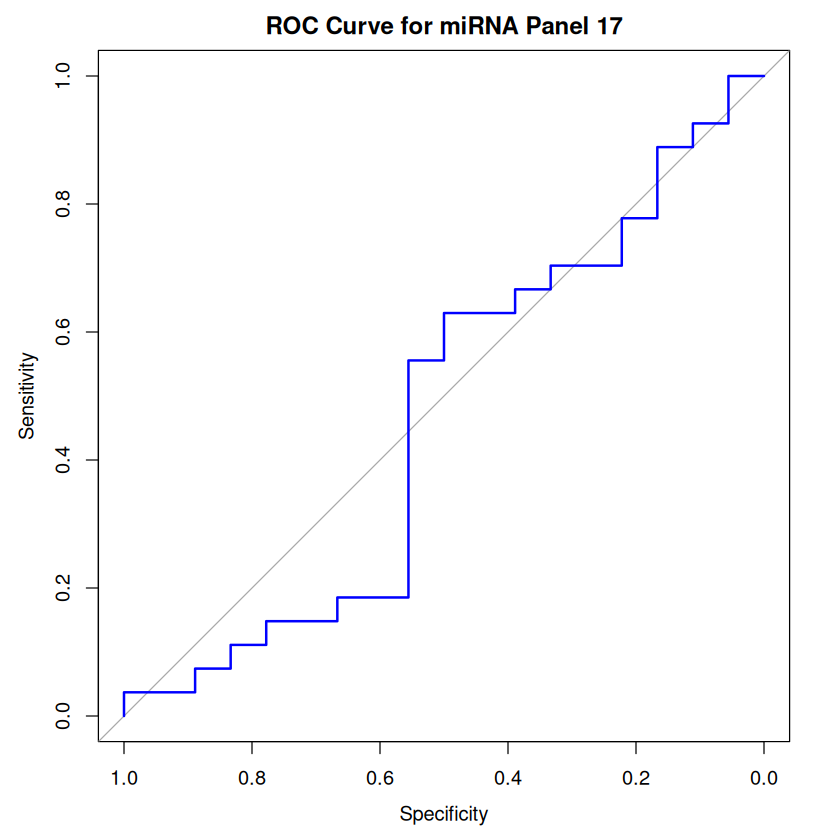

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Joining with `by = join_by(miRNA1, miRNA2, miRNA3, miRNA4)`


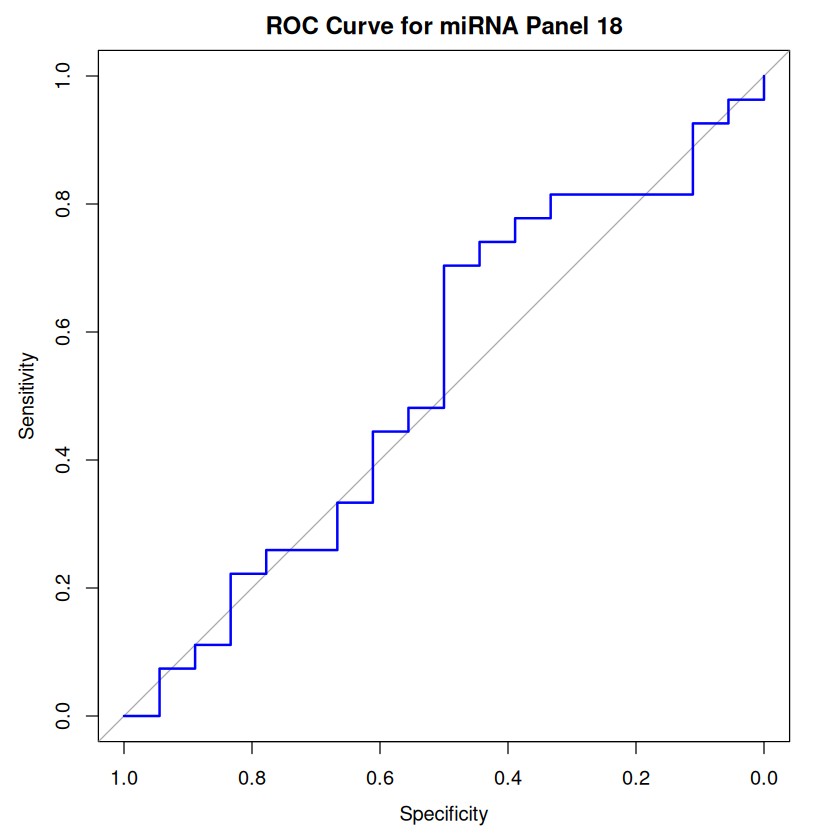

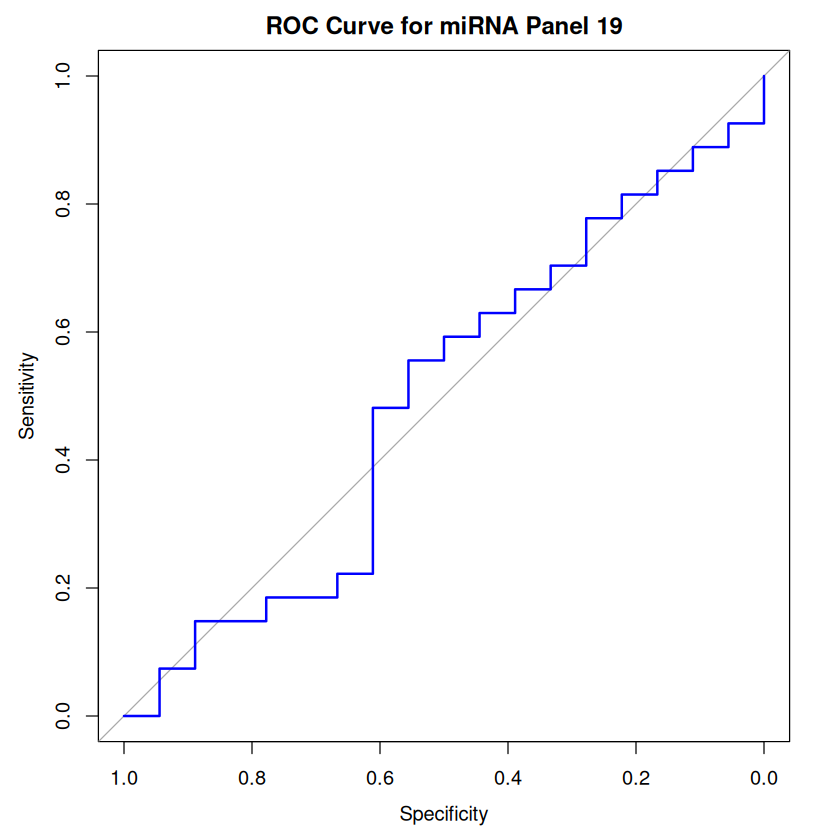

# A tibble: 20 × 20
   miRNA1  miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
   <chr>   <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
 1 hsa-mi… hsa-m… hsa-l… NA                  0.727              0.667 0.7121212 
 2 hsa-mi… hsa-m… hsa-m… NA                  0.818              0.667 0.6515152 
 3 hsa-mi… hsa-m… hsa-m… NA                  0.818              0.667 0.6818182 
 4 hsa-mi… hsa-m… hsa-l… NA                  1                  0.5   0.6666667 
 5 hsa-mi… hsa-l… hsa-m… NA                  0.636              0.833 0.7424242 
 6 hsa-mi… hsa-l… hsa-m… NA                  0.545              1     0.7727273 
 7 hsa-mi… hsa-l… hsa-l… NA                  1                  0.5   0.6969697 
 8 hsa-mi… hsa-m… hsa-m… NA                  0.818              0.667 0.6666667 
 9 hsa-mi… hsa-m… hsa-l… NA                  0.909              0.667 0.7272727 
10 hsa-mi… hsa-m… hsa-l… NA                  1                  0.667 0.7121212 
11 hsa-m

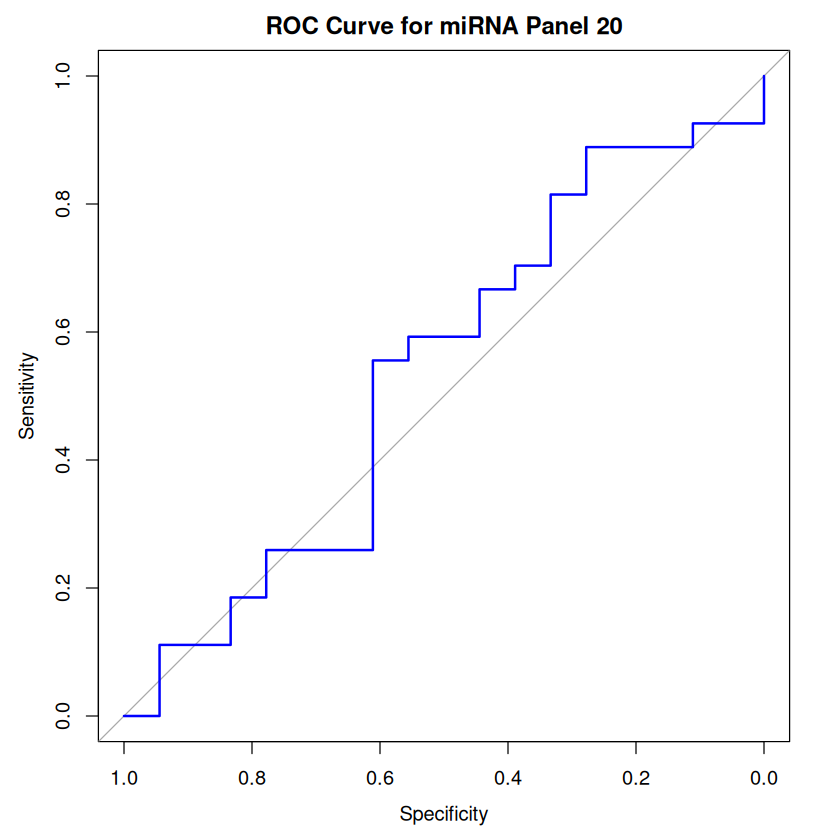

In [244]:
# Load PASD_vector and convert to binary
PASD_vector <- read.csv('naz_demo.csv')[2]
PASD_binary <- as.data.frame(lapply(PASD_vector, function(x) ifelse(x <= 1, 0, 1)))

# Create combination indices for miRNA panels
combn_index <- combn(len_miRNAs, 3)
ROC_result_combine <- NULL

# Loop through all combinations
for (i in 1:ncol(combn_index)) {
    miRNA_panel <- miRNA_panels[combn_index[, i]]

    # Process batch 1 data
    data_b1 <- as_tibble(t(b1[miRNA_panel, ]))
    data2_b1 <- tibble(ID = colnames(b1), data_b1)
    data2_b1 <- data2_b1 %>% dplyr::select(-ID)
    data2_b1$PASD_binary <- PASD_binary[1:17, ]

    # Logistic regression model for batch 1
    alogistic <- glm(PASD_binary ~ ., family = binomial(link = "logit"), data = data2_b1)
    pheno_edata_miRNA3 <- data2_b1 %>% mutate(fitted = predict(alogistic, data2_b1, type = "response"))

    # ROC analysis for batch 1
    aroc <- roc(pheno_edata_miRNA3$PASD_binary, pheno_edata_miRNA3$fitted)
    anindex <- which.max(aroc$sens * aroc$spec)
    asens <- aroc$sens[anindex]
    aspec <- aroc$spec[anindex]
    aauc <- aroc$auc
    asens_spec <- asens * aspec  # Youden index

    # MCC, precision, recall, balanced accuracy for batch 1
    prediction <- ifelse(pheno_edata_miRNA3$fitted >= aroc$thresholds[anindex], 1, 0)
    cm <- confusionMatrix(factor(prediction), factor(pheno_edata_miRNA3$PASD_binary))

    amcc <- cm$byClass["MCC"]
    aprecision <- cm$byClass["Precision"]
    arecall <- cm$byClass["Recall"]
    abalanced_accuracy <- cm$byClass["Balanced Accuracy"]

    # Store results for batch 1
    aROC_result_batch1 <- tibble(
        miRNA1 = miRNA_panel[1],
        miRNA2 = miRNA_panel[2],
        miRNA3 = miRNA_panel[3],
        miRNA4 = miRNA_panel[4],
        sensitivity_batch1 = asens,
        specificity_batch1 = aspec,
        AUC_batch1 = aauc,
        `sensitivity*specificity_batch1` = asens_spec,
        MCC_batch1 = amcc,
        precision_batch1 = aprecision,
        recall_batch1 = arecall,
        balanced_accuracy_batch1 = abalanced_accuracy
    )

    # Process batch 2 data
    data_b2 <- as_tibble(t(b2[miRNA_panel, ]))
    data2_b2 <- tibble(ID = colnames(b2), data_b2)
    data2_b2$PASD_binary <- PASD_binary[18:62, ]

    # ROC analysis for batch 2
    pheno_edata_miRNA3_batch2 <- data2_b2 %>% mutate(fitted = predict(alogistic, data2_b2, type = "response"))
    aroc <- roc(pheno_edata_miRNA3_batch2$PASD_binary, pheno_edata_miRNA3_batch2$fitted)
    anindex <- which.max(aroc$sens * aroc$spec)
    asens <- aroc$sens[anindex]
    aspec <- aroc$spec[anindex]
    aauc <- aroc$auc
    asens_spec <- asens * aspec  # Youden index

    # MCC, precision, recall, balanced accuracy for batch 2
    prediction <- ifelse(pheno_edata_miRNA3_batch2$fitted >= aroc$thresholds[anindex], 1, 0)
    cm <- confusionMatrix(factor(prediction), factor(pheno_edata_miRNA3_batch2$PASD_binary))

    amcc <- cm$byClass["MCC"]
    aprecision <- cm$byClass["Precision"]
    arecall <- cm$byClass["Recall"]
    abalanced_accuracy <- cm$byClass["Balanced Accuracy"]

    # Store results for batch 2
    aROC_result_batch2 <- tibble(
        miRNA1 = miRNA_panel[1],
        miRNA2 = miRNA_panel[2],
        miRNA3 = miRNA_panel[3],
        miRNA4 = miRNA_panel[4],
        sensitivity_batch2 = asens,
        specificity_batch2 = aspec,
        AUC_batch2 = aauc,
        `sensitivity*specificity_batch2` = asens_spec,
        MCC_batch2 = amcc,
        precision_batch2 = aprecision,
        recall_batch2 = arecall,
        balanced_accuracy_batch2 = abalanced_accuracy
    )

    # Combine results from both batches
    ROC_result_combine <- rbind(ROC_result_combine, left_join(aROC_result_batch1, aROC_result_batch2))

    # Plot ROC curve for the panel
    plot(aroc, main = paste("ROC Curve for miRNA Panel", i), col = "blue")
}

# Display the combined ROC results
print(ROC_result_combine)


In [250]:
b1 <- read.csv('data_panels_batch1.csv')
b2 <- read.csv('data_panels_batch2.csv')
groupings <- read.csv('naz_demo.csv')
b1g <- groupings[1:17,2]
rownames(b1) <- b1$X

b2g <- groupings[18:45,2]
rownames(b2) <- b2$X

b1 <- b1 %>% dplyr::select(2:18)
b2 <- b2 %>% dplyr::select(2:46)

#from caleb's code
miRNA_panels <- c(
    "hsa-miR-23a-3p",
    "hsa-miR-223-3p",
    "hsa-let-7a-5p",
    "hsa-miR-15b-5p",
    "hsa-miR-374a-3p",
    "hsa-let-7f-5p"
    )
len_miRNAs <- length(miRNA_panels)
combn_index <- combn(len_miRNAs,4)

# Load PASD_vector and convert to binary
PASD_vector <- read.csv('naz_demo.csv')[2]
PASD_binary <- as.data.frame(lapply(PASD_vector, function(x) ifelse(x <= 1, 0, 1)))

# Loop through all combinations
for (i in 1:ncol(combn_index)) {
    miRNA_panel <- miRNA_panels[combn_index[, i]]

    # Process batch 1 data
    data_b1 <- as_tibble(t(b1[miRNA_panel, ]))
    data2_b1 <- tibble(ID = colnames(b1), data_b1)
    data2_b1 <- data2_b1 %>% dplyr::select(-ID)
    data2_b1$PASD_binary <- PASD_binary[1:17, ]
    
    # Fisher's Linear Discriminant Analysis for batch 1
    aLDA <- lda(PASD_binary ~ ., data = data2_b1)
    
    # Predict fitted values
    pheno_edata_miRNA3 <- data2_b1 %>% mutate(fitted = predict(aLDA)$posterior[, 2])
    
    # ROC analysis for batch 1
    aroc <- roc(pheno_edata_miRNA3$PASD_binary, pheno_edata_miRNA3$fitted)
    anindex <- which.max(aroc$sens * aroc$spec)
    asens <- aroc$sens[anindex]
    aspec <- aroc$spec[anindex]
    aauc <- aroc$auc
    asens_spec <- asens * aspec
    athreshold <- aroc$thresholds[anindex]
    case <- ifelse(aroc$direction == "<", 1, 0)
    
    # Store results for batch 1
    aROC_result_batch1 <- tibble(
        miRNA1 = miRNA_panel[1],
        miRNA2 = miRNA_panel[2],
        miRNA3 = miRNA_panel[3],
        miRNA4 = miRNA_panel[4],
        sensitivity_batch1 = asens,
        specificity_batch1 = aspec, 
        AUC_batch1 = aauc,
        `sensitivity*specificity_batch1` = asens_spec
    )
    
    # Process batch 2 data
    data_b2 <- as_tibble(t(b2[miRNA_panel, ]))
    data2_b2 <- tibble(ID = colnames(b2), data_b2) %>% dplyr::select(-ID)
    data2_b2$PASD_binary <- PASD_binary[18:62,]
    
    # Fisher's LDA for batch 2 (using model trained from batch 1)
    pheno_edata_miRNA3_batch2 <- data2_b2 %>% mutate(fitted = predict(aLDA, data2_b2)$posterior[, 2])
    
    # ROC analysis for batch 2
    aroc <- roc(pheno_edata_miRNA3_batch2$PASD_binary, pheno_edata_miRNA3_batch2$fitted)
    anindex <- which.max(aroc$sens * aroc$spec)
    asens <- aroc$sens[anindex]
    aspec <- aroc$spec[anindex]
    aauc <- aroc$auc
    asens_spec <- asens * aspec
    athreshold <- aroc$thresholds[anindex]
    case <- ifelse(aroc$direction == "<", 1, 0)
    
    # Store results for batch 2
    aROC_result_batch2 <- tibble(
        miRNA1 = miRNA_panel[1],
        miRNA2 = miRNA_panel[2],
        miRNA3 = miRNA_panel[3],
        miRNA4 = miRNA_panel[4],
        sensitivity_batch2 = asens,
        specificity_batch2 = aspec, 
        AUC_batch2 = aauc,
        `sensitivity*specificity_batch2` = asens_spec
    )
    
    # Combine results
    print(aROC_result_batch1)
    print(aROC_result_batch2)
}

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-l… hsa-m…              0.909                0.5 0.6515152 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-l… hsa-m…              0.481              0.722 0.5288066 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-l… hsa-m…              0.909              0.667 0.6969697 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-l… hsa-m…              0.556              0.556 0.526749  
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-l… hsa-l…              0.818              0.667 0.6818182 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-l… hsa-l…              0.667              0.444 0.5288066 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-m… hsa-m…              0.909              0.667 0.7424242 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-m… hsa-m…              0.593                0.5 0.5164609 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-m… hsa-l…              0.818                0.5 0.6515152 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-m… hsa-l…              0.481              0.611 0.4876543 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-m… hsa-l…                  1                0.5 0.6666667 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-m… hsa-l…              0.593              0.611 0.5226337 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-m…              0.636              0.833 0.7272727 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-m…              0.444              0.667 0.4938272 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-l…              0.818                0.5 0.6515152 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-l…              0.444              0.722 0.5246914 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-l…              0.909              0.667 0.6666667 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-l…              0.778              0.389 0.5164609 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-m… hsa-l…              0.455                  1 0.6818182 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-m… hsa-l…              0.444              0.667 0.5020576 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-m…              0.818              0.667 0.7272727 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-m…              0.593                0.5 0.5123457 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-l…              0.727              0.667 0.6969697 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-l…              0.407              0.778 0.5144033 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-l…              0.818              0.667 0.6666667 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-l…              0.778              0.389 0.5411523 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-m… hsa-l…              0.636              0.833 0.7121212 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-m… hsa-l…              0.519              0.611 0.4876543 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-let… hsa-m… hsa-m… hsa-l…              0.727              0.667 0.6818182 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-let… hsa-m… hsa-m… hsa-l…              0.519              0.556 0.4753086 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


In [248]:
b1 <- read.csv('data_panels_batch1.csv')
b2 <- read.csv('data_panels_batch2.csv')
groupings <- read.csv('naz_demo.csv')
b1g <- groupings[1:17,2]
rownames(b1) <- b1$X

b2g <- groupings[18:45,2]
rownames(b2) <- b2$X

b1 <- b1 %>% dplyr::select(2:18)
b2 <- b2 %>% dplyr::select(2:46)

#from caleb's code
miRNA_panels <- c(
    "hsa-miR-23a-3p",
    "hsa-miR-223-3p",
    "hsa-let-7a-5p",
    "hsa-miR-15b-5p",
    "hsa-miR-374a-3p",
    "hsa-let-7f-5p"
    )
len_miRNAs <- length(miRNA_panels)
combn_index <- combn(len_miRNAs,4)

# Load PASD_vector and convert to binary
PASD_vector <- read.csv('naz_demo.csv')[2]
PASD_binary <- as.data.frame(lapply(PASD_vector, function(x) ifelse(x <= 1, 0, 1)))

# Loop through all combinations
for (i in 1:ncol(combn_index)) {
    miRNA_panel <- miRNA_panels[combn_index[, i]]

    # Process batch 1 data
    data_b1 <- as_tibble(t(b1[miRNA_panel, ]))
    data2_b1 <- tibble(ID = colnames(b1), data_b1)
    data2_b1 <- data2_b1 %>% dplyr::select(-ID)
    data2_b1$PASD_binary <- PASD_binary[1:17, ]
    
    # Fisher's Linear Discriminant Analysis for batch 1
    aLDA <- lda(PASD_binary ~ ., data = data2_b1)
    
    # Predict fitted values
    pheno_edata_miRNA3 <- data2_b1 %>% mutate(fitted = predict(aLDA)$posterior[, 2])
    
    # ROC analysis for batch 1
    aroc <- roc(pheno_edata_miRNA3$PASD_binary, pheno_edata_miRNA3$fitted)
    anindex <- which.max(aroc$sens * aroc$spec)
    asens <- aroc$sens[anindex]
    aspec <- aroc$spec[anindex]
    aauc <- aroc$auc
    asens_spec <- asens * aspec
    athreshold <- aroc$thresholds[anindex]
    case <- ifelse(aroc$direction == "<", 1, 0)
    
    # Store results for batch 1
    aROC_result_batch1 <- tibble(
        miRNA1 = miRNA_panel[1],
        miRNA2 = miRNA_panel[2],
        miRNA3 = miRNA_panel[3],
        miRNA4 = miRNA_panel[4],
        sensitivity_batch1 = asens,
        specificity_batch1 = aspec, 
        AUC_batch1 = aauc,
        `sensitivity*specificity_batch1` = asens_spec
    )
    
    # Process batch 2 data
    data_b2 <- as_tibble(t(b2[miRNA_panel, ]))
    data2_b2 <- tibble(ID = colnames(b2), data_b2) %>% dplyr::select(-ID)
    data2_b2$PASD_binary <- PASD_binary[18:62,]
    
    # Fisher's LDA for batch 2 (using model trained from batch 1)
    pheno_edata_miRNA3_batch2 <- data2_b2 %>% mutate(fitted = predict(aLDA, data2_b2)$posterior[, 2])
    
    # ROC analysis for batch 2
    aroc <- roc(pheno_edata_miRNA3_batch2$PASD_binary, pheno_edata_miRNA3_batch2$fitted)
    anindex <- which.max(aroc$sens * aroc$spec)
    asens <- aroc$sens[anindex]
    aspec <- aroc$spec[anindex]
    aauc <- aroc$auc
    asens_spec <- asens * aspec
    athreshold <- aroc$thresholds[anindex]
    case <- ifelse(aroc$direction == "<", 1, 0)
    
    # Store results for batch 2
    aROC_result_batch2 <- tibble(
        miRNA1 = miRNA_panel[1],
        miRNA2 = miRNA_panel[2],
        miRNA3 = miRNA_panel[3],
        miRNA4 = miRNA_panel[4],
        sensitivity_batch2 = asens,
        specificity_batch2 = aspec, 
        AUC_batch2 = aauc,
        `sensitivity*specificity_batch2` = asens_spec
    )
    
    # Combine results
    print(aROC_result_batch1)
    print(aROC_result_batch2)
}

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-l… hsa-m…              0.909                0.5 0.6515152 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-l… hsa-m…              0.481              0.722 0.5288066 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-l… hsa-m…              0.909              0.667 0.6969697 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-l… hsa-m…              0.556              0.556 0.526749  
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-l… hsa-l…              0.818              0.667 0.6818182 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-l… hsa-l…              0.667              0.444 0.5288066 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-m… hsa-m…              0.909              0.667 0.7424242 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-m… hsa-m…              0.593                0.5 0.5164609 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-m… hsa-l…              0.818                0.5 0.6515152 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-m… hsa-l…              0.481              0.611 0.4876543 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-m… hsa-l…                  1                0.5 0.6666667 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-m… hsa-l…              0.593              0.611 0.5226337 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-m…              0.636              0.833 0.7272727 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-m…              0.444              0.667 0.4938272 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-l…              0.818                0.5 0.6515152 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-l…              0.444              0.722 0.5246914 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-l…              0.909              0.667 0.6666667 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-l…              0.778              0.389 0.5164609 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-m… hsa-l…              0.455                  1 0.6818182 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-m… hsa-l…              0.444              0.667 0.5020576 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-m…              0.818              0.667 0.7272727 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-m…              0.593                0.5 0.5123457 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-l…              0.727              0.667 0.6969697 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-l…              0.407              0.778 0.5144033 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-l…              0.818              0.667 0.6666667 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-l… hsa-m… hsa-l…              0.778              0.389 0.5411523 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-m… hsa-l…              0.636              0.833 0.7121212 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-miR… hsa-m… hsa-m… hsa-l…              0.519              0.611 0.4876543 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases



# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch1 specificity_batch1 AUC_batch1
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-let… hsa-m… hsa-m… hsa-l…              0.727              0.667 0.6818182 
# ℹ 1 more variable: `sensitivity*specificity_batch1` <dbl>
# A tibble: 1 × 8
  miRNA1   miRNA2 miRNA3 miRNA4 sensitivity_batch2 specificity_batch2 AUC_batch2
  <chr>    <chr>  <chr>  <chr>               <dbl>              <dbl> <auc>     
1 hsa-let… hsa-m… hsa-m… hsa-l…              0.519              0.556 0.4753086 
# ℹ 1 more variable: `sensitivity*specificity_batch2` <dbl>
